### Library 

In [46]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from scipy import stats

path_main_folder = '/home/antorosi/Documents/AutoEncoder'

sys.path.append(path_main_folder)

from CVAE.cvae import compile_cvae, run_cvae
from CVAE.cvae_model import CVAE
from conso.load_shape_data import *  
from conso.conso_helpers import plot_latent_space_projection, pyplot_latent_space_projection_temp, pyplot_latent_space_projection_error

### Load and shape data 

In [92]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [93]:
# Load Holiday day information
holiday_days_csv = os.path.join(path_data, "joursFeries.csv")
holiday_days_df = pd.read_csv(holiday_days_csv, sep=";")
holiday_days_df.ds = pd.to_datetime(holiday_days_df.ds)
holiday_days_df['is_hd'] = 1

In [94]:
# Unifomization
data_conso_df, dict_colnames_conso = get_uniformed_data_conso(dict_data_conso)

In [95]:
# Change ganularity ?
name_granu = '15m'
data_conso_df = change_granularity(data_conso_df, granularity="15min")

In [96]:
# Get x_conso dataframe for autoencoder purpose
x_conso = get_x_conso_autoencoder(data_conso_df, dict_colnames_conso)

### Build dataset 

In [222]:
# Split train and test
date_test_start = datetime.date(2014,1,1)
date_test_end = datetime.date(2015,1,1)
dict_xconso = get_train_test_x_conso(x_conso, date_test_start, date_test_end)

#dict_xconso = {'train': x_conso}

In [223]:
# Normalize x_conso
type_scaler = 's'
dict_xconso = normalize_xconso(dict_xconso, dict_colnames_conso, type_scaler = 'standard')

In [224]:
name_type_cond = 'm-wd'
name_train = '0' # 1: first period ; 0 all periods
name_type_x = 'c'
type_x = ['conso']
type_cond = ['month', 'weekday']

In [225]:
dataset = get_dataset_autoencoder(dict_xconso=dict_xconso, type_x=type_x, type_cond=type_cond)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [134]:
dataset['train']['x'][0].shape

(1830, 96)

### Build model

In [135]:
path_out = os.path.join(path_main_folder, 'out')

In [197]:
# Parameters
cond_dim = dataset['train']['x'][1].shape[1]
e_dims=[48,24,12]
d_dims=[12,24,48]
z_dim= 2
beta = 1

In [198]:
name_model = 'cvae_conso_e48-24-12_d12-24-48_gran-{}_x-{}_cond-{}'.format(name_granu,name_type_x, name_type_cond)

In [199]:
name_model

'cvae_conso_e48-24-12_d12-24-48_gran-15m_x-c_cond-m-wd'

In [200]:
model = CVAE(cond_dim=cond_dim, 
             e_dims=e_dims, 
             d_dims=d_dims, 
             z_dim=z_dim, 
             beta=beta,
             name=name_model, 
             output=path_out)

complete model: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_true (InputLayer)             (None, 96)           0                                            
__________________________________________________________________________________________________
cond (InputLayer)               (None, 14)           0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 6856        x_true[0][0]                     
                                                                 cond[0][0]                       
__________________________________________________________________________________________________
sample_z (Lambda)               (None, 2)            0           encoder[1][0]              

### Trainning model 



--- START TRAINING ---

Epoch 1/200
1830/1830 [==============================] - 0s 259us/step - loss: 40.1825 - kl_loss: 5.7023 - recon_loss: 34.4803
Epoch 2/200
1830/1830 [==============================] - 0s 70us/step - loss: 10.0617 - kl_loss: 3.8738 - recon_loss: 6.1879
Epoch 3/200
1830/1830 [==============================] - 0s 71us/step - loss: 7.5737 - kl_loss: 3.2587 - recon_loss: 4.3150
Epoch 4/200
1830/1830 [==============================] - 0s 69us/step - loss: 6.9421 - kl_loss: 3.1474 - recon_loss: 3.7947
Epoch 5/200
1830/1830 [==============================] - 0s 72us/step - loss: 6.5377 - kl_loss: 2.9784 - recon_loss: 3.5593
Epoch 6/200
1830/1830 [==============================] - 0s 72us/step - loss: 6.2098 - kl_loss: 2.8574 - recon_loss: 3.3524
Epoch 7/200
1830/1830 [==============================] - 0s 73us/step - loss: 5.8995 - kl_loss: 2.7403 - recon_loss: 3.1592
Epoch 8/200
1830/1830 [==============================] - 0s 72us/step - loss: 5.7088 - kl_loss: 2.7171

1830/1830 [==============================] - 0s 68us/step - loss: 3.3180 - kl_loss: 1.5118 - recon_loss: 1.8062
Epoch 67/200
1830/1830 [==============================] - 0s 72us/step - loss: 3.2833 - kl_loss: 1.5183 - recon_loss: 1.7649
Epoch 68/200
1830/1830 [==============================] - 0s 68us/step - loss: 3.3650 - kl_loss: 1.5248 - recon_loss: 1.8401
Epoch 69/200
1830/1830 [==============================] - 0s 67us/step - loss: 3.3468 - kl_loss: 1.5353 - recon_loss: 1.8115
Epoch 70/200
1830/1830 [==============================] - 0s 69us/step - loss: 3.3406 - kl_loss: 1.5263 - recon_loss: 1.8144
Epoch 71/200
1830/1830 [==============================] - 0s 71us/step - loss: 3.3098 - kl_loss: 1.5145 - recon_loss: 1.7953
Epoch 72/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.2790 - kl_loss: 1.5068 - recon_loss: 1.7721
Epoch 73/200
1830/1830 [==============================] - 0s 68us/step - loss: 3.2612 - kl_loss: 1.4947 - recon_loss: 1.7665
Epoch 74/200


1830/1830 [==============================] - 0s 68us/step - loss: 3.0199 - kl_loss: 1.3728 - recon_loss: 1.6471
Epoch 132/200
1830/1830 [==============================] - 0s 75us/step - loss: 3.0457 - kl_loss: 1.3817 - recon_loss: 1.6640
Epoch 133/200
1830/1830 [==============================] - 0s 74us/step - loss: 3.0216 - kl_loss: 1.3605 - recon_loss: 1.6611
Epoch 134/200
1830/1830 [==============================] - 0s 75us/step - loss: 3.0731 - kl_loss: 1.4111 - recon_loss: 1.6620
Epoch 135/200
1830/1830 [==============================] - 0s 74us/step - loss: 3.0494 - kl_loss: 1.3846 - recon_loss: 1.6648
Epoch 136/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.0173 - kl_loss: 1.3806 - recon_loss: 1.6366
Epoch 137/200
1830/1830 [==============================] - 0s 70us/step - loss: 3.0621 - kl_loss: 1.3892 - recon_loss: 1.6728
Epoch 138/200
1830/1830 [==============================] - 0s 73us/step - loss: 3.0619 - kl_loss: 1.3660 - recon_loss: 1.6959
Epoch 

1830/1830 [==============================] - 0s 70us/step - loss: 2.9444 - kl_loss: 1.3793 - recon_loss: 1.5651
Epoch 197/200
1830/1830 [==============================] - 0s 73us/step - loss: 2.9255 - kl_loss: 1.3321 - recon_loss: 1.5934
Epoch 198/200
1830/1830 [==============================] - 0s 73us/step - loss: 2.9318 - kl_loss: 1.3606 - recon_loss: 1.5711
Epoch 199/200
1830/1830 [==============================] - 0s 75us/step - loss: 2.9373 - kl_loss: 1.3558 - recon_loss: 1.5815
Epoch 200/200
1830/1830 [==============================] - 0s 71us/step - loss: 2.9235 - kl_loss: 1.3353 - recon_loss: 1.5882


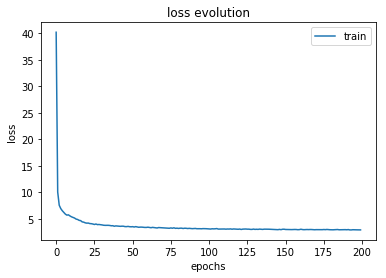

In [201]:
model.main_train(dataset, training_epochs=200, batch_size=20, verbose=False)

### Loading model 

In [202]:
#model.load_model(os.path.join(path_out, name_model, 'models'))

### Analysis of the latent space

In [203]:
name_set_plot = 'train'
version = ''

In [204]:
x_encoded = model.encoder.predict(dataset[name_set_plot]['x'])[0]

In [205]:
calendar_info = pd.DataFrame(dataset[name_set_plot]['ds'])
calendar_info['month'] = calendar_info.ds.dt.month
calendar_info['weekday'] = calendar_info.ds.dt.weekday
calendar_info['is_weekday'] = (calendar_info.weekday < 5).apply(lambda x:int(x))
calendar_info = pd.merge(calendar_info, holiday_days_df[['ds', 'is_hd']], on='ds', how ='left')
calendar_info.loc[calendar_info['is_hd'].isna(),'is_hd'] = 0

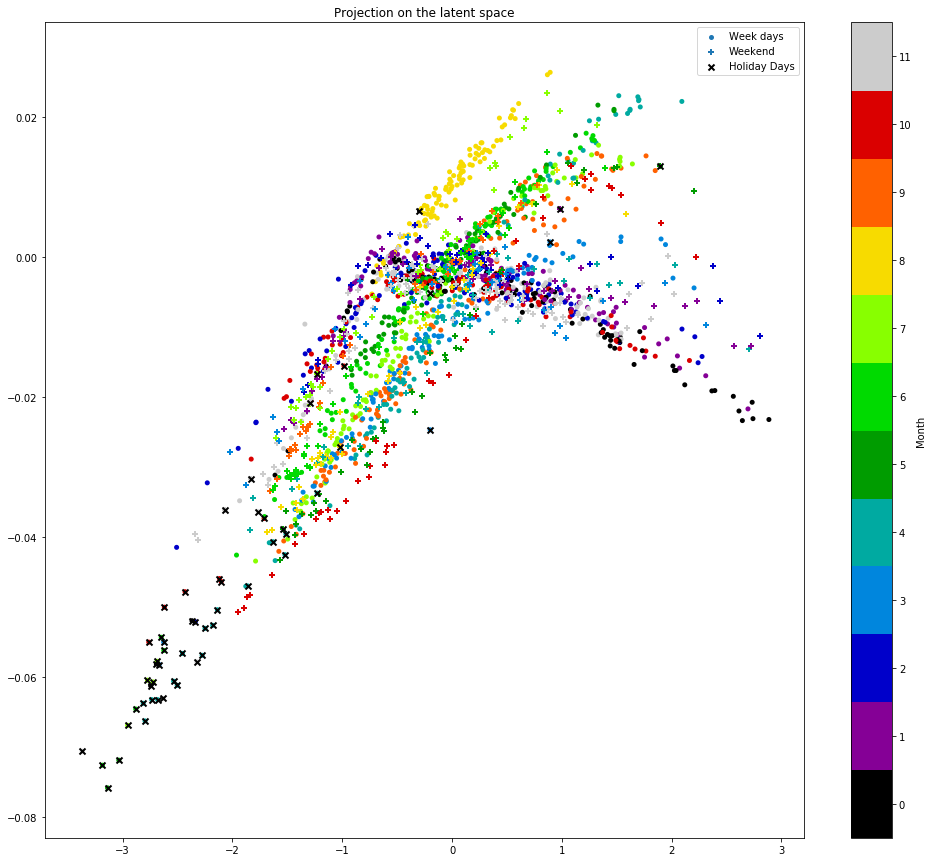

In [206]:
name_plot = 'z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
plot_latent_space_projection(x_proj=x_encoded, calendar_info=calendar_info,
                             path_folder_out=os.path.join(path_out,name_model,'results'), name=name_plot, 
                             pyplot=True, plotly = False)

In [207]:
temp = get_cond_autoencoder(dataset['train']['ds'], type_cond=['temp'], data_conso_df=data_conso_df)
temp = temp.flatten()

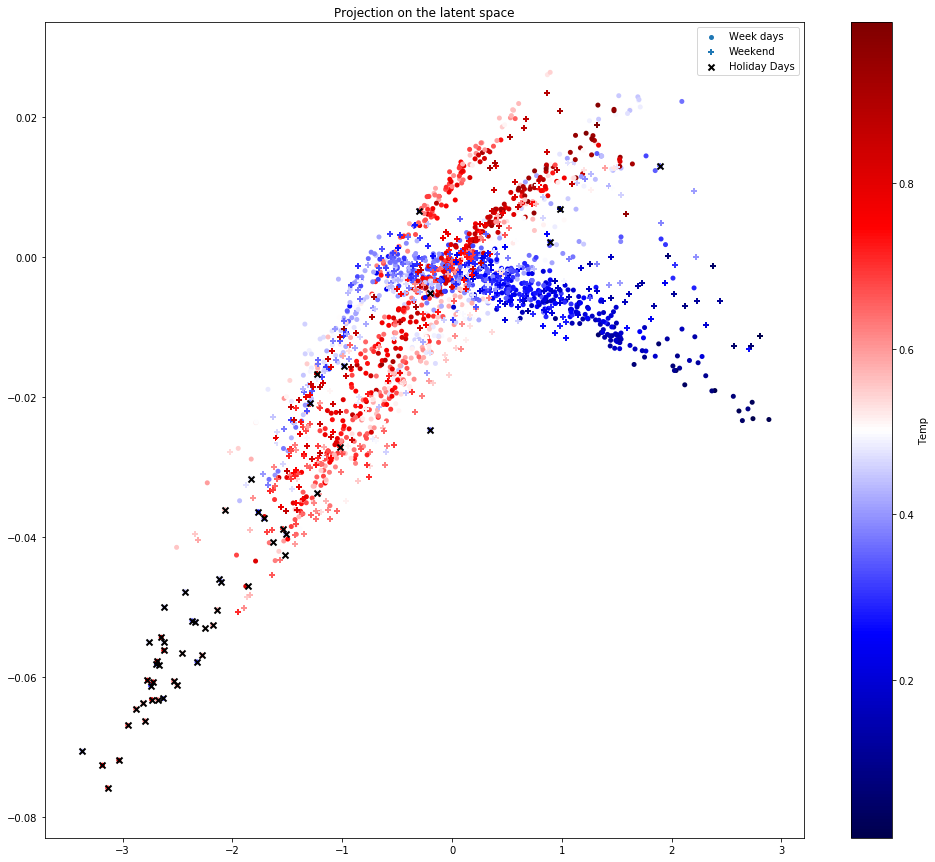

In [208]:
name_plot = 'temp_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
pyplot_latent_space_projection_temp(x_encoded, calendar_info, temp,os.path.join(path_out,name_model,'results'), name_plot)

### Analyse of the reconstruction error

In [169]:
[x, cond] = dataset['train']['x']
x_hat = model.cvae.predict(x=[x, cond])

In [170]:
res_mat = (x - x_hat)
res = res_mat.mean(axis=1)

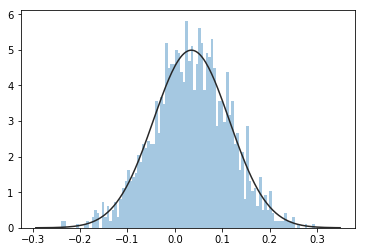

In [171]:
sn.distplot(res, kde=False, fit=stats.norm, bins=100)

In [172]:
res_conso_mat = res_mat[:,:48]
res_temp_mat = res_mat[:,48:]

In [173]:
res_conso = res_conso_mat.mean(axis=1)
res_temp = res_temp_mat.mean(axis=1)

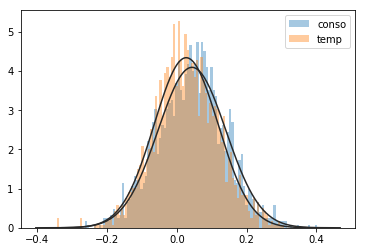

In [174]:
sn.distplot(res_conso, kde=False, fit=stats.norm, bins=100, label='conso')
sn.distplot(res_temp, kde=False, fit=stats.norm, bins=100, label='temp')
plt.legend()

In [175]:
results = dict()
results['me'] = {'all': res, 'temp': res_temp, 'conso': res_conso}

In [176]:
results['mae'] = {
    'all': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_mat),
    'conso': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_conso_mat),
    'temp': np.apply_along_axis(lambda x: np.abs(x).mean(),1, res_temp_mat)
}

In [177]:
results['z_score'] = {}
results['a_score'] = {}

for key, me in results['me'].items():
    z_score = stats.zscore(me)
    a_score = 1-2 * stats.norm.cdf(-np.abs(z_score))
    
    results['z_score'][key] = z_score
    results['a_score'][key] = a_score

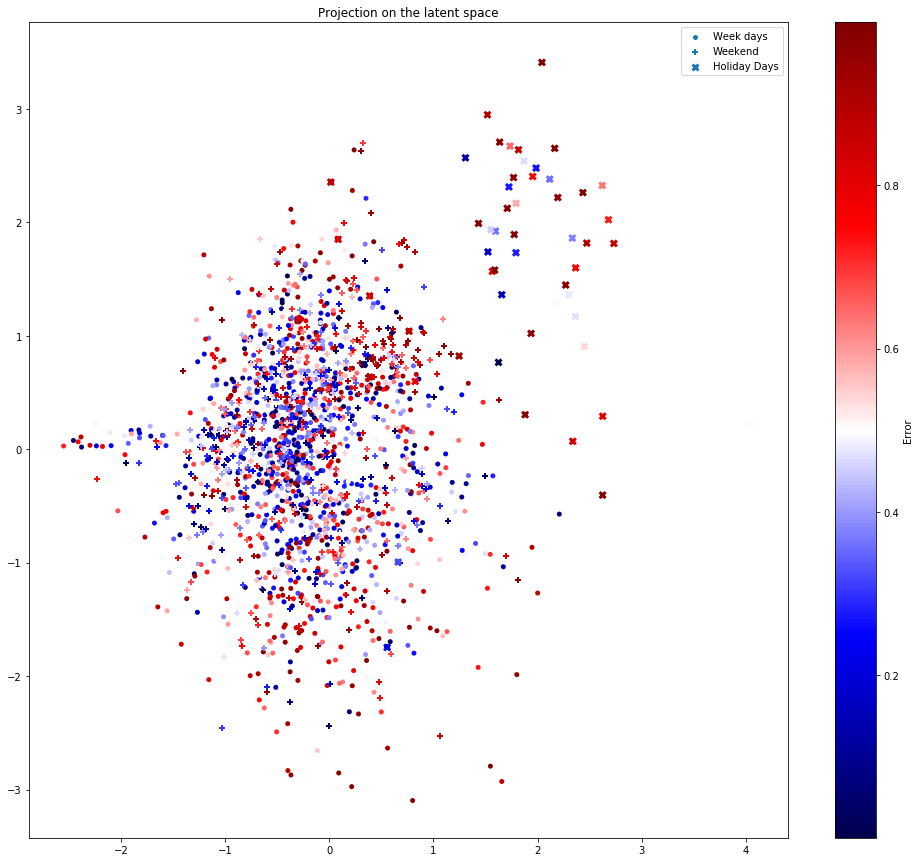

In [178]:
type_error = 'a_score'
type_data = 'all'

name_plot = '{}-{}_z{}_n-{}_beta-{}_train-{}_set-{}_cond-{}{}'.format(type_error, type_data,str(z_dim),type_scaler,str(beta), name_train, name_set_plot,str(name_type_cond),version)
path_plot = os.path.join(path_out,name_model,'results')

error = results[type_error][type_data]
pyplot_latent_space_projection_error(x_encoded, calendar_info, error, color='seismic', path_folder_out=path_plot, name=name_plot)

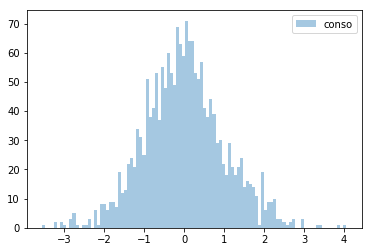

In [227]:
sn.distplot(results['z_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

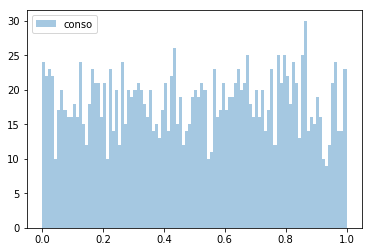

In [146]:
sn.distplot(results['a_score']['conso'], kde=False, bins=100, label='conso')
plt.legend()

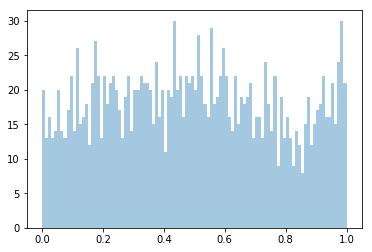

In [228]:
sn.distplot(stats.norm.cdf(results['z_score']['conso']), kde=False, bins=100, label='conso')

In [194]:
indice = 200

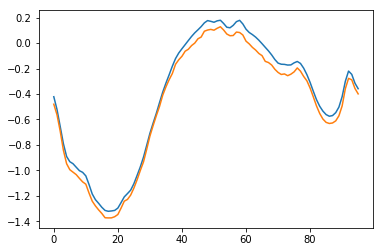

In [195]:
plt.plot(x[indice,])
plt.plot(x_hat[indice,])

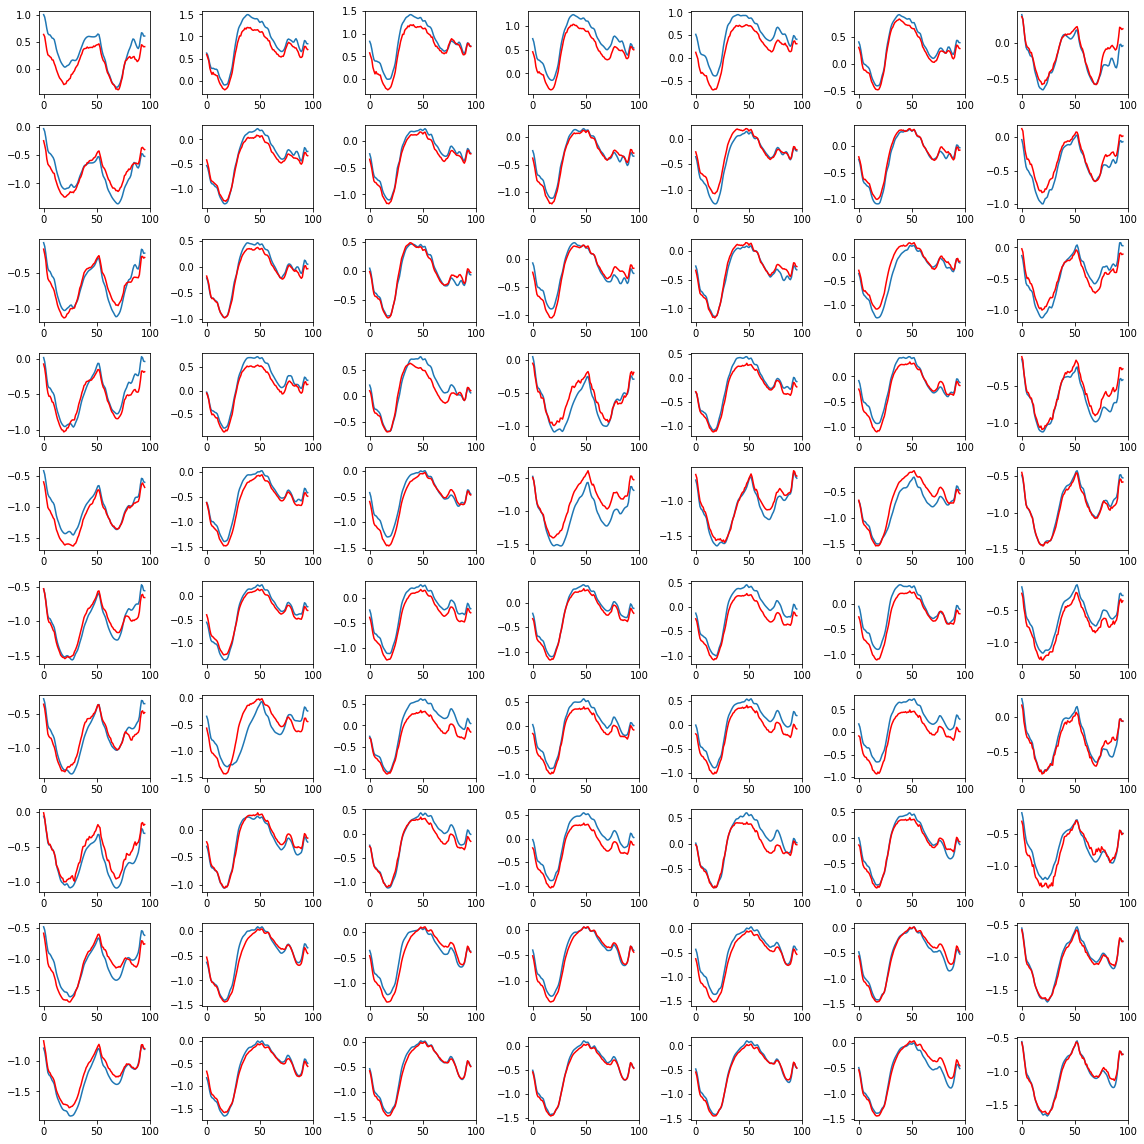

In [193]:
fig, axes = plt.subplots(10,7, figsize=(16,16))

ind = 100

for ax_row in axes:
    for ax in ax_row:
        # create a twin of the axis that shares the x-axis
        # plot some data on each axis.
        ax.plot(x[ind,:])
        ax.plot(x_hat[ind,:],'-r')
        
        ind+=1

plt.tight_layout()
plt.show()

In [228]:
model.history.keys()

dict_keys(['kl_loss', 'loss', 'recon_loss'])

In [229]:
el = model.history


In [231]:
el['kl_loss'][-1]

1.3353316627564977